### Multiclass News Classsification using Hugging Face Transformer
@author : Jaydatta

email - jaydattabade11@gmail.com

In [71]:
# import neccessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support as score
import tensorflow as tf

In [72]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Importing Dataset

In [3]:
# Loading the dataset
df = pd.read_csv("bbc-news-data.csv", sep='\t')

In [4]:
# First five data points
df.head()

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...


In [5]:
# removing unnecessory column
df.drop(['filename'], axis=1, inplace=True)

In [6]:
df.head(2)

,category,title,content
0,business,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...


In [7]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   title     2225 non-null   object
 2   content   2225 non-null   object
dtypes: object(3)
memory usage: 52.3+ KB


In [8]:
# shape of dataset
df.shape

(2225, 3)

In [9]:
# checking for duplicate values
df.duplicated().sum()

98

In [10]:
# dropping duplicate values
df.drop_duplicates(inplace=True)

In [11]:
# shape of dataset after removing duplicates
df.shape

(2127, 3)

In [12]:
# checking for null values
df.isnull().sum()

category    0
title       0
content     0
dtype: int64

In [13]:
# count of news categories
df['category'].value_counts()

sport            505
business         503
politics         403
entertainment    369
tech             347
Name: category, dtype: int64

In [14]:
df['category'].unique()

array(['business', 'entertainment', 'politics', 'sport', 'tech'],
      dtype=object)

- There are five news categories i.e. 'business', 'entertainment', 'politics', 'sport', 'tech'

# Visualizing Data

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


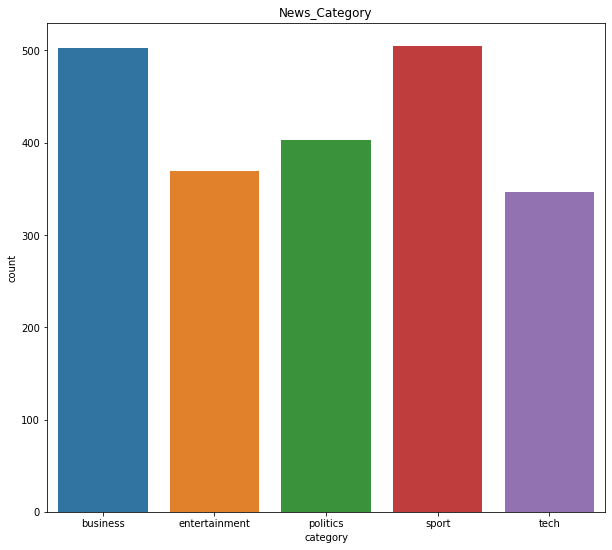

In [15]:
# News Categories
plt.figure(figsize=(10,9))
sns.countplot(df['category'])
plt.title('News_Category')
plt.show()

In [16]:
# first sample data point
df['category'][0]

'business'

In [17]:
df['title'][0]

'Ad sales boost Time Warner profit'

In [18]:
df['content'][0]

' Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.  The firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.  Time Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL\'s underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sign up AOL\'s existing customers for high-

#### We will now concat the title and content columns into a single Text column

In [19]:
# Concatenate the news_headline and news_article columns into a single 'text' column
df['text'] = df['title'] + ' ' + df['content']

In [20]:
# Print the updated DataFrame
print(df.head(2))

   category                              title  \
0  business  Ad sales boost Time Warner profit   
1  business   Dollar gains on Greenspan speech   

                                             content  \
0   Quarterly profits at US media giant TimeWarne...   
1   The dollar has hit its highest level against ...   

                                                text  
0  Ad sales boost Time Warner profit  Quarterly p...  
1  Dollar gains on Greenspan speech  The dollar h...  


In [21]:
df['text'][0]

'Ad sales boost Time Warner profit  Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.  The firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.  Time Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL\'s underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sign up A

In [22]:
# creating a new dataframe which contains only text and category columns
new_df=df[['text','category']]
new_df

,text,category
0,Ad sales boost Time Warner profit Quarterly p...,business
1,Dollar gains on Greenspan speech The dollar h...,business
2,Yukos unit buyer faces loan claim The owners ...,business
3,High fuel prices hit BA's profits British Air...,business
4,Pernod takeover talk lifts Domecq Shares in U...,business
...,...,...
2219,New consoles promise big problems Making game...,tech
2220,BT program to beat dialler scams BT is introd...,tech
2222,Be careful how you code A new European direct...,tech
2223,US cyber security chief resigns The man makin...,tech


# Text Preprocessing / cleaning

In [23]:
# applying some text cleaning functions

# Convert Everything in Lower Case
def convert_lower(text):
   return text.lower()

# remove numbers
def remove_numbers(text):
    number_pattern = r'\d+'
    without_number = re.sub(pattern=number_pattern, repl=" ", string=text)
    return without_number

# Remove Special Characters
def special_char(text):
    data = ''
    for x in text:
        if x.isalnum() or x.isspace():
            data = data + x
        else:
            data = data + ' '
    return data

# lemmatization
def lemmatizing(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    for i in range(len(tokens)):
        lemma_word = lemmatizer.lemmatize(tokens[i])
        tokens[i] = lemma_word
    return " ".join(tokens)

# Remove all Stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    # word tokenize the text
    words = word_tokenize(text)
    filtered_words = [x for x in words if x not in stop_words]
    return ' '.join(filtered_words)

# remove extra white spaces
def remove_extra_white_spaces(text):
    pattern = r'\s+[a-zA-Z]\s+'
    without_extra_spaces = re.sub(pattern=pattern, repl=" ", string=text)
    return without_extra_spaces

In [25]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [26]:
new_df['text'] = new_df['text'].apply(convert_lower)
new_df['text'] = new_df['text'].apply(remove_numbers)
new_df['text'] = new_df['text'].apply(special_char)
new_df['text'] = new_df['text'].apply(lemmatizing)
new_df['text'] = new_df['text'].apply(remove_stopwords)
new_df['text'] = new_df['text'].apply(remove_extra_white_spaces)

<ipython-input-26-f935980d40a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['text'] = new_df['text'].apply(convert_lower)
<ipython-input-26-f935980d40a1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['text'] = new_df['text'].apply(remove_numbers)
<ipython-input-26-f935980d40a1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

In [27]:
new_df['text'][1]

'dollar gain greenspan speech dollar ha hit highest level euro almost three month federal reserve head said trade deficit set stabilise alan greenspan highlighted government willingness curb spending rising household saving factor may help reduce late trading new york dollar reached euro thursday market concern deficit ha hit greenback recent month friday federal reserve chairman mr greenspan speech london ahead meeting finance minister sent dollar higher earlier tumbled back worse expected job data think chairman taking much sanguine view current account deficit taken time said robert sinche head currency strategy bank america new york taking longer term view laying set condition current account deficit improve year next worry deficit concern china however remain china currency remains pegged dollar currency sharp fall recent month therefore made chinese export price highly competitive call shift beijing policy fallen deaf ear despite recent comment major chinese newspaper time ripe l

In [28]:
new_df['category'].unique()

array(['business', 'entertainment', 'politics', 'sport', 'tech'],
      dtype=object)

In [29]:
# to see english stopwords
# stopwords.words('english')

In [30]:
encoded_dict = {}

for idx, label in enumerate(df.category.unique()):
    encoded_dict[label] = idx

encoded_dict

{'business': 0, 'entertainment': 1, 'politics': 2, 'sport': 3, 'tech': 4}

In [31]:
new_df['category'] = new_df.category.map(encoded_dict)

<ipython-input-31-a364ecc26cb2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['category'] = new_df.category.map(encoded_dict)


In [32]:
new_df.tail()

,text,category
2219,new console promise big problem making game fu...,4
2220,bt program beat dialler scam bt introducing tw...,4
2222,careful code new european directive could put ...,4
2223,u cyber security chief resigns man making sure...,4
2224,losing online gaming online role playing game ...,4


# Train Test Split

In [33]:
df_train, df_test = train_test_split(new_df, test_size=0.2, shuffle=True, random_state=42)
print(len(df_train))
print(len(df_test))

1701
426


In [34]:
df_train['category']

1271    2
486     0
1135    2
1342    3
885     1
       ..
1680    3
1119    2
1155    2
1333    3
884     1
Name: category, Length: 1701, dtype: int64

In [35]:
df_test['category']

284     0
2055    4
1753    3
1012    2
2076    4
       ..
307     0
997     2
620     1
2201    4
192     0
Name: category, Length: 426, dtype: int64

In [36]:
# importing to_categorical class from utils:
from tensorflow.keras.utils import to_categorical

In [37]:
# converting our integer coded category column into categorical data(matrix)
# converting integer-coded labels to one-hot encoded vectors 
y_train = to_categorical(df_train.category)
y_test = to_categorical(df_test.category)

In [38]:
y_train

array([[0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

# Load Pre-trained BERT model

In [39]:
# pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 95.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 KB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 115.1 MB/s eta 0:00:00


In [40]:
from transformers import AutoTokenizer,TFBertModel
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')
bert = TFBertModel.from_pretrained('bert-base-cased')

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [41]:
# Input Data Modeling
# Before training, we need to convert the input textual data into BERT’s input data format using a tokenizer.
# Since we have loaded bert-base-cased, so tokenizer will also be Bert-base-cased.

In [42]:
# Tokenize the input (takes some time) 
# here tokenizer using from bert-base-cased
x_train = tokenizer(
    text=df_train.text.tolist(),
    add_special_tokens=True,
    max_length=256,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)
x_test = tokenizer(
    text=df_test.text.tolist(),
    add_special_tokens=True,
    max_length=256,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

In [43]:
# x_train

In [44]:
input_ids = x_train['input_ids']
attention_mask = x_train['attention_mask']

# Model Building

In [45]:
# Importing necessary libraries.

import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense

In [49]:
# Define the model
max_len = 256
input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
input_mask = Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")

# Freeze BERT layers to fine-tune
bert.trainable = False

# Get embeddings and pass them through the dense layers for classification
embeddings = bert(input_ids,attention_mask = input_mask)[0] 
out = tf.keras.layers.GlobalMaxPool1D()(embeddings)
out = Dense(128, activation='relu')(out)
out = tf.keras.layers.Dropout(0.1)(out)
out = Dense(32, activation='relu')(out)
y = Dense(len(df_train.category.unique()), activation='softmax')(out)

# Unfreeze the last 4 layers of BERT for fine-tuning
bert.trainable = True
for layer in bert.layers[-4:]:
    layer.trainable = True

# Build the model
model = tf.keras.Model(inputs=[input_ids, input_mask], outputs=y)

# Model Compilation

In [51]:
# Model Compilation
optimizer = tf.keras.optimizers.Adam(
    learning_rate=5e-05, # this learning rate is for bert model , taken from huggingface website 
    epsilon=1e-08,
    clipnorm=1.0)
# Set loss and metrics
loss = CategoricalCrossentropy()
metric = CategoricalAccuracy()
# Compile the model
model.compile(
    optimizer=optimizer,
    loss=loss, 
    metrics=metric)

Early stopping is a technique that allows you to stop training the model when the validation loss starts to increase. This helps prevent overfitting and improves generalization

In [52]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=3, 
    mode='min', 
    restore_best_weights=True
)

# Model Training

In [55]:
train_history = model.fit(
    x = {'input_ids': x_train['input_ids'], 'attention_mask': x_train['attention_mask']},
    y = y_train,
    validation_data = (
        {'input_ids': x_test['input_ids'], 'attention_mask': x_test['attention_mask']}, y_test
    ),
    epochs = 5,
    batch_size = 16
)

Epoch 1/5
107/107 [==============================] - 107s 998ms/step - loss: 0.0650 - categorical_accuracy: 0.9871 - val_loss: 0.1585 - val_categorical_accuracy: 0.9624
Epoch 2/5
107/107 [==============================] - 106s 988ms/step - loss: 0.0231 - categorical_accuracy: 0.9947 - val_loss: 0.1643 - val_categorical_accuracy: 0.9695
Epoch 3/5
107/107 [==============================] - 110s 1s/step - loss: 0.0258 - categorical_accuracy: 0.9924 - val_loss: 0.1744 - val_categorical_accuracy: 0.9648
Epoch 4/5
107/107 [==============================] - 106s 988ms/step - loss: 0.0031 - categorical_accuracy: 0.9994 - val_loss: 0.1751 - val_categorical_accuracy: 0.9765
Epoch 5/5
107/107 [==============================] - 103s 962ms/step - loss: 0.0075 - categorical_accuracy: 0.9994 - val_loss: 0.1412 - val_categorical_accuracy: 0.9742


In [56]:
test_loss, test_accuracy = model.evaluate(
    {'input_ids': x_test['input_ids'], 'attention_mask': x_test['attention_mask']},
    y_test,
    batch_size=16
)

print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

27/27 [==============================] - 8s 299ms/step - loss: 0.1412 - categorical_accuracy: 0.9742
Test loss: 0.1412
Test accuracy: 0.9742


# Model Evaluation

In [58]:
# Model Evaluation
# Testing our model on the test data.
predicted_raw = model.predict({'input_ids':x_test['input_ids'],'attention_mask':x_test['attention_mask']})
predicted_raw[0]

14/14 [==============================] - 12s 556ms/step


array([9.9981052e-01, 7.6211390e-06, 1.0294073e-04, 3.7672598e-05,
       4.1246938e-05], dtype=float32)

In [63]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(df_train.category)

y_train = label_encoder.transform(df_train.category)
y_test = label_encoder.transform(df_test.category)


In [64]:
y_predicted = np.argmax(predicted_raw, axis=1)
y_predicted = [label_encoder.inverse_transform([label])[0] for label in y_predicted]

In [66]:
y_true = df_test['category'].values


# Classification Report

In [67]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_true, y_predicted))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       104
           1       0.97      0.97      0.97        78
           2       0.96      0.99      0.97        73
           3       0.98      1.00      0.99        98
           4       0.95      0.97      0.96        73

    accuracy                           0.97       426
   macro avg       0.97      0.98      0.97       426
weighted avg       0.97      0.97      0.97       426



In [74]:
new_df['text'][5]


'japan narrowly escape recession japan economy teetered brink technical recession three month september figure show revised figure indicated growth similar sized contraction previous quarter annual basis data suggests annual growth suggesting much hesitant recovery previously thought common technical definition recession two successive quarter negative growth government wa keen play worrying implication data maintain view japan economy remains minor adjustment phase upward climb monitor development carefully said economy minister heizo takenaka face strengthening yen making export le competitive indication weakening economic condition ahead observer le sanguine painting picture recovery much patchier previously thought said paul sheard economist lehman brother tokyo improvement job market apparently yet feed domestic demand private consumption third quarter'

In [75]:
new_df['category'][5]


0

# Prediction Pipeline


In [76]:
# Converting indexes back to the Sentiment label:

texts = input('Enter some text to classify: ')
x_val = tokenizer(
    text=texts,
    add_special_tokens=True,
    max_length=256,
    truncation=True,
    padding='max_length', 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True) 
validation = model.predict({'input_ids':x_val['input_ids'],'attention_mask':x_val['attention_mask']})*100
for key , value in zip(encoded_dict.keys(),validation[0]):
    print(key,value)

Enter some text to classify: japan narrowly escape recession japan economy teetered brink technical recession three month september figure show revised figure indicated growth similar sized contraction previous quarter annual basis data suggests annual growth suggesting much hesitant recovery previously thought common technical definition recession two successive quarter negative growth government wa keen play worrying implication data maintain view japan economy remains minor adjustment phase upward climb monitor development carefully said economy minister heizo takenaka face strengthening yen making export le competitive indication weakening economic condition ahead observer le sanguine painting picture recovery much patchier previously thought said paul sheard economist lehman brother tokyo improvement job market apparently yet feed domestic demand private consumption third quarter
1/1 [==============================] - 0s 175ms/step
business 99.992195
entertainment 0.00049340393
po